### PROYECTO INTEGRADOR

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing
from functools import reduce

In [3]:
datosp=pd.read_csv('bd_clean.csv',sep=';', index_col=0) #Carga datos
datosp.reset_index(inplace = True)

datosp.head(10)

,Unnamed: 0,Cliente_Id,Sexo,Estrato,Grupo_valor,Rango_ingresos_acum,Nivel_estudio,Estado_civil,Departamento,Edad,...,cnt_trx_201901,cnt_trx_201902,cnt_trx_201903,cnt_trx_201904,cnt_trx_201905,cnt_trx_201906,Total_trx,Recency,Outliers,Mahal Distance
0,40,45653157,F,5,Alto,28500000,Especializacion,VIUDO,VALLE DEL CAUCA,79,...,0,3,0,0,1,0,218,1,0.0,24.666.421.569.284.500
1,51,25037319,M,4,Alto,21000000,Especializacion,VIUDO,ANTIOQUIA,77,...,0,0,0,0,0,0,213,6,0.0,23.174.371.361.607.200
2,53,48475523,F,4,Medio,3000000,Pregrado,VIUDO,BOGOTA D.C.,77,...,2,1,0,4,0,3,57,0,0.0,2.355.978.670.469.800
3,55,46339223,F,5,Alto,22500000,Pregrado,VIUDO,BOGOTA D.C.,76,...,2,0,0,0,0,0,165,5,0.0,2.297.498.409.336.870
4,56,21539592,F,6,Alto,13500000,Especializacion,VIUDO,ANTIOQUIA,76,...,0,0,0,0,0,0,124,8,0.0,2.270.742.320.012.310
5,57,22638493,F,5,Alto,9000000,Pregrado,VIUDO,BOGOTA D.C.,76,...,0,1,0,1,0,0,65,2,0.0,2.413.978.058.794.140
6,58,21439876,F,4,Alto,7800000,Maestria,VIUDO,BOGOTA D.C.,76,...,8,11,20,3,3,8,166,0,0.0,22.721.736.545.752.900
7,59,184445,M,6,Alto,4800000,Especializacion,VIUDO,ANTIOQUIA,76,...,0,0,1,1,0,0,37,2,0.0,24.445.307.632.577.300
8,60,46707787,F,4,Alto,4500000,Especializacion,VIUDO,ANTIOQUIA,76,...,0,7,5,1,8,2,178,0,0.0,2.381.357.194.959.680
9,62,34929752,M,4,Alto,30000000,Especializacion,VIUDO,BOGOTA D.C.,75,...,2,3,1,1,0,0,234,2,0.0,22.555.252.163.284.600


Para crear el modelo FMR, es necesario identificar los  percentiles a los que  pertenece cada cliente, viendo de manera individual su frecuencia,monto trasado,y Recencia(tiempo transcurrido en meses desde su última compra).

In [4]:
Trx=datosp.Total_trx.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()
Monto=datosp.Monto_transado.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()
Rec=datosp.Recency.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()

Definimos  una calificación a cada cliente por  pertenecer a cada  uno de los  rangos  del percentil

In [5]:
Frecuency=[]
Money=[]
Rcency=[]

for i in range(0,len(datosp)):
    if np.array(datosp.Total_trx)[i]<=Trx[0]:
        F=1
    elif np.array(datosp.Total_trx)[i]<=Trx[1]:
        F=2
    elif np.array(datosp.Total_trx)[i]<=Trx[2]:  
        F=3
    elif np.array(datosp.Total_trx)[i]<=Trx[3]: 
        F=4
    else:
        F=5
    Frecuency.append(F)

for i in range(0,len(datosp)):
    if np.array(datosp.Monto_transado)[i]<=Monto[0]:
        M=1
    elif np.array(datosp.Monto_transado)[i]<=Monto[1]:
        M=2
    elif np.array(datosp.Monto_transado)[i]<=Monto[2]:  
        M=3
    elif np.array(datosp.Monto_transado)[i]<=Monto[3]:
        M=4
    else:
        M=5
    Money.append(M)
    
for i in range(0,len(datosp)):
    if np.array(datosp.Recency)[i]<=Rec[0]:
        R=5
    elif np.array(datosp.Recency)[i]<=Rec[1]:
        R=4
    elif np.array(datosp.Recency)[i]<=Rec[2]:  
        R=3
    elif np.array(datosp.Recency)[i]<=Rec[3]: 
        R=2
    else:
        R=1
    Rcency.append(R)

datosp['Frecuency']=Frecuency
datosp['Money']=Money
datosp['Rcency']=Rcency

Calculamos el score RFM

In [6]:
datosp['RFM']=datosp.Frecuency*datosp.Money*datosp.Rcency
datosp.head()

,Unnamed: 0,Cliente_Id,Sexo,Estrato,Grupo_valor,Rango_ingresos_acum,Nivel_estudio,Estado_civil,Departamento,Edad,...,cnt_trx_201905,cnt_trx_201906,Total_trx,Recency,Outliers,Mahal Distance,Frecuency,Money,Rcency,RFM
0,40,45653157,F,5,Alto,28500000,Especializacion,VIUDO,VALLE DEL CAUCA,79,...,1,0,218,1,0.0,24.666.421.569.284.500,5,3,3,45
1,51,25037319,M,4,Alto,21000000,Especializacion,VIUDO,ANTIOQUIA,77,...,0,0,213,6,0.0,23.174.371.361.607.200,4,3,3,36
2,53,48475523,F,4,Medio,3000000,Pregrado,VIUDO,BOGOTA D.C.,77,...,0,3,57,0,0.0,2.355.978.670.469.800,2,4,5,40
3,55,46339223,F,5,Alto,22500000,Pregrado,VIUDO,BOGOTA D.C.,76,...,0,0,165,5,0.0,2.297.498.409.336.870,4,2,3,24
4,56,21539592,F,6,Alto,13500000,Especializacion,VIUDO,ANTIOQUIA,76,...,0,0,124,8,0.0,2.270.742.320.012.310,4,3,2,24


Calculamos  los percentiles del score RFM

In [7]:
RFM_perc=datosp.RFM.quantile([0.2,0.4,0.6,0.8,1]).values.tolist()
RFM_perc

[6.0, 16.0, 30.0, 60.0, 125.0]

In [8]:
Percentil=[]
for i in range(0,len(datosp)):
    if np.array(datosp.RFM)[i]<=RFM_perc[0]:
        P=1
    elif np.array(datosp.RFM)[i]<=RFM_perc[1]:
        P=2
    elif np.array(datosp.RFM)[i]<=RFM_perc[2]:  
        P=3
    elif np.array(datosp.RFM)[i]<=RFM_perc[3]: 
        P=4
    else:
        P=5
    Percentil.append(P)
datosp['Percentil_RFM']=Percentil

In [9]:
datosp.head()

,Unnamed: 0,Cliente_Id,Sexo,Estrato,Grupo_valor,Rango_ingresos_acum,Nivel_estudio,Estado_civil,Departamento,Edad,...,cnt_trx_201906,Total_trx,Recency,Outliers,Mahal Distance,Frecuency,Money,Rcency,RFM,Percentil_RFM
0,40,45653157,F,5,Alto,28500000,Especializacion,VIUDO,VALLE DEL CAUCA,79,...,0,218,1,0.0,24.666.421.569.284.500,5,3,3,45,4
1,51,25037319,M,4,Alto,21000000,Especializacion,VIUDO,ANTIOQUIA,77,...,0,213,6,0.0,23.174.371.361.607.200,4,3,3,36,4
2,53,48475523,F,4,Medio,3000000,Pregrado,VIUDO,BOGOTA D.C.,77,...,3,57,0,0.0,2.355.978.670.469.800,2,4,5,40,4
3,55,46339223,F,5,Alto,22500000,Pregrado,VIUDO,BOGOTA D.C.,76,...,0,165,5,0.0,2.297.498.409.336.870,4,2,3,24,3
4,56,21539592,F,6,Alto,13500000,Especializacion,VIUDO,ANTIOQUIA,76,...,0,124,8,0.0,2.270.742.320.012.310,4,3,2,24,3


# Implementación KMEDOIDS

A continuación se realizará la selección de variables númericas y categóricas

In [10]:
#Quitamos los datos que no hacen parte de la muestra
dfp = datosp

### Selección variables numéricas

In [11]:
Percentil = 1

In [12]:
dfp = dfp[dfp['Percentil_RFM'] == Percentil]

In [13]:
dfpnum = pd.DataFrame(datosp[['Rango_ingresos_acum','Edad','Reclamos','RFM']])

#### Estandarización de datos numéricos

In [14]:
mm_scaler = preprocessing.MinMaxScaler()

In [15]:
def normalize_function(dfpnum):
    mm_scaler = preprocessing.MinMaxScaler()
    df_minmax = pd.DataFrame(dmm_scaler.fit_transform(dfpnum[['Rango_ingresos_acum','Edad','Reclamos','RFM']]), columns=dfpnum.columns)
    return(df_minmax)

In [16]:
df_minmax = pd.DataFrame(mm_scaler.fit_transform(dfpnum[['Rango_ingresos_acum','Edad','Reclamos','RFM']]), columns=dfpnum.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
df_minmax['id'] = dfp['Cliente_Id']

### Selección variables categoricas

In [18]:
dfp['Estrato'] = dfp['Estrato'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
dfpcat = pd.DataFrame(dfp[['Sexo','Estrato','Grupo_valor','Nivel_estudio','Estado_civil','Departamento','Franquicia','canal','origen','RFM','Percentil_RFM']])

Convertimos las variables categoricas a dummie

In [20]:
dfpcat = pd.get_dummies(dfpcat)
dfpcat['id'] = dfp['Cliente_Id']


In [21]:
dfpcat.head()

,RFM,Percentil_RFM,Sexo_F,Sexo_M,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,...,Franquicia_AMEX,Franquicia_MASTER,Franquicia_VISA,canal_I,canal_Ninguno,canal_P,origen_Internacional,origen_Nacional,origen_Ninguno,id
7,6,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,184445
16,4,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,7830931
19,5,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,578621
30,5,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,8268440
33,2,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,6677706


In [22]:
sample = pd.merge(df_minmax,dfpcat,how='inner',left_on=['id'],right_on=['id'])

In [23]:
sample0 = pd.merge(df_minmax,dfpcat,how='inner',left_on=['id'],right_on=['id'])

In [24]:
sample1 = sample

In [25]:
sample2 = sample1.drop(['id'], axis='columns', inplace=True)

In [26]:
from sklearn import preprocessing
from functools import reduce

In [27]:
! pip install pyclustering

In [28]:
from pyclustering.cluster.kmedoids import kmedoids

In [29]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

In [30]:
sample = sample.values.tolist()

In [31]:
from pyclustering.cluster.kmedoids import kmedoids
import random
random.seed(131)

def kmedoids_eval(max_clusters,data):
    points=list(range(0,100))
    initial_centers =sorted(random.sample(points,max_clusters))
    # Create instance of K-Means algorithm with prepared centers.
    kmedoids_instance = kmedoids(data, initial_centers)
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    locations= kmedoids_instance.get_medoids()
    representatives=[]
    for k in range(0,len(locations)):
        representatives1=list(sample[locations[k]])
        representatives.append(representatives1)   
    distan=[]
    for i in range(0,max_clusters):
        clust1=clusters[i]
        bsas1=[]
        for j in range(0,len(clust1)):
            sam=list(set(data[j])-set(representatives[i]))
            dist=sum(power(sam,2))**(1/2)
            bsas1.append(dist)
            
        dist1=sum(bsas1)/len(bsas1)
        distan.append(dist1)
    return [max_clusters,0,round(sum(distan),5)]   


In [32]:
def power(my_list,a):
    return [ x**a for x in my_list ]

In [33]:
m_clust=list(range(4,30))

In [34]:
resultado_def = []
vals3=[]
for m in range(0,(len(m_clust))):
    res=kmedoids_eval(m_clust[m],sample)
    vals3.append(res)
resultado = pd.DataFrame(vals3, columns =['N_clust','Umbral','Distancia']) 
resultado3=resultado[resultado['Distancia']==resultado['Distancia'].min()]
resultado3['metodo']='kmedoids'
resultado_def=resultado_def.append(resultado3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
resultado

,N_clust,Umbral,Distancia
0,4,0,13.43864
1,5,0,14.85859
2,6,0,19.94971
3,7,0,20.23263
4,8,0,22.68862
5,9,0,31.87784
6,10,0,33.62253
7,11,0,34.31800
8,12,0,39.54764
9,13,0,43.85765


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

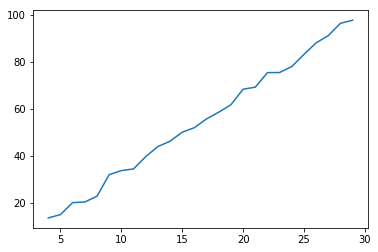

In [37]:
plt.plot(resultado['N_clust'].values,resultado['Distancia'].values)

In [38]:
def kmedoids_alg(n_clusters,data):
    points=list(range(0,30))
    initial_centers =sorted(random.sample(points,n_clusters))
    # Create instance of K-Means algorithm with prepared centers.
    instance_method = kmedoids(data, initial_centers)
    instance_method.process()
    clusters =instance_method.get_clusters()
    clust=[]
    for i in range(0,n_clusters):
        clust1=clusters[i]
        for j in range(0,len(clust1)):
            clust2=[i,clust1[j]]
            clust.append(clust2)
    c_list=np.vstack(clust)
    clust_list=pd.DataFrame({'GRUPO': c_list[:, 0], 'id': c_list[:, 1]})
    clust_list.sort_values(by=['id'], ascending=[1], inplace=True)
    clust_list['Cliente_Id']=df['Cliente_Id']
    clust_list=clust_list[['GRUPO','Cliente_Id']]
    clust_list.sort_values(by=['GRUPO'], ascending=[1], inplace=True)
    return(clust_list)

In [39]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [40]:
df=datosp

## Implementación KMEANS

In [67]:
def kmeans_alg(n_clusters,data):
    initial_centers = kmeans_plusplus_initializer(data,n_clusters).initialize()
    # Create instance of K-Means algorithm with prepared centers.
    instance_method = kmeans(data, initial_centers)
    instance_method.process()
    clusters =instance_method.get_clusters()
    clust=[]
    for i in range(0,n_clusters):
        clust1=clusters[i]
        for j in range(0,len(clust1)):
            clust2=[i,clust1[j]]
            clust.append(clust2)
    c_list=np.vstack(clust)
    clust_list=pd.DataFrame({'GRUPO': c_list[:, 0], 'id': c_list[:, 1]})
    clust_list.sort_values(by=['id'], ascending=[1], inplace=True)
    clust_list['Cliente_Id']=df['Cliente_Id']
    clust_list=clust_list[['GRUPO','Cliente_Id']]
    clust_list.sort_values(by=['GRUPO'], ascending=[1], inplace=True)
    return(clust_list)

In [42]:
from pyclustering.cluster.kmeans import kmeans #, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

def kmeans_eval(max_clusters,data):
    initial_centers = kmeans_plusplus_initializer(data, max_clusters).initialize()
    # Create instance of K-Means algorithm with prepared centers.
    kmeans_instance = kmeans(data, initial_centers)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    representatives= kmeans_instance.get_centers()
    distan=[]
    for i in range(0,max_clusters):
        clust1=clusters[i]
        bsas1=[]
        for j in range(0,len(clust1)):
            sam=list(set(data[j])-set(representatives[i]))
            dist=sum(power(sam,2))**(1/2)
            bsas1.append(dist)
            
        dist1=sum(bsas1)/len(bsas1)
        distan.append(dist1)
    return [max_clusters,0,round(sum(distan),5)]  

In [43]:
resultado1=[]
vals1=[]
for m in range(0,len(m_clust)):
    res=kmeans_eval(m_clust[m],sample)
    vals1.append(res)
resultadokm = pd.DataFrame(vals1, columns =['N_clust','Umbral','Distancia']) 
resultado2=resultadokm[resultadokm['Distancia']==resultadokm['Distancia'].min()]
resultado2['metodo']='kmeans'
resultado_def=resultado1.append(resultado2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
resultado2

,N_clust,Umbral,Distancia,metodo
0,4,0,14.34376,kmeans


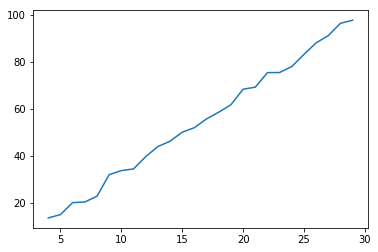

In [44]:
plt.plot(resultado['N_clust'].values,resultado['Distancia'].values)

In [46]:
resultado2

,N_clust,Umbral,Distancia,metodo
0,4,0,14.34376,kmeans


In [47]:
resultado3

,N_clust,Umbral,Distancia,metodo
0,4,0,13.43864,kmedoids


## Exportar resultados para kmedoids

In [52]:
resultadoskmedoids=kmedoids_alg(max(resultado3['N_clust']),sample)

In [55]:
resultadoskmedoids.head()

,GRUPO,Cliente_Id
1,0,25037319
159,0,34045558
158,0,17299538
157,0,31939968
156,0,7296642


In [64]:
resultadokmd = pd.merge(resultadoskmedoids,datosp,how='inner',left_on=['Cliente_Id'],right_on=['Cliente_Id'])

In [65]:
resultadokmd.to_csv('kmedoids.csv')

## Exportar resultados para kmeans

In [69]:
resultadoskmeans=kmeans_alg(max(resultado2['N_clust']),sample)

In [70]:
resultadokm = pd.merge(resultadoskmeans,datosp,how='inner',left_on=['Cliente_Id'],right_on=['Cliente_Id'])

In [71]:
resultadokm.to_csv('kmeans.csv')